<a href="https://colab.research.google.com/github/luckysinghal1008/-EDA_Optimising_NYC_Taxis_-lucky-/blob/main/flood_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/trainflood.csv')
df_test=pd.read_csv('/content/drive/MyDrive/testflood.csv')
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3.0,3.0,...,5.0,3.0,3.0,5.0,4.0,7.0,5.0,7.0,3.0,0.445
1,1,6,7,4,4,8,8,3,5.0,4.0,...,7.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,3.0,0.450
2,2,6,5,6,7,3,7,1,5.0,4.0,...,7.0,3.0,7.0,5.0,6.0,8.0,2.0,3.0,3.0,0.530
3,3,3,4,6,5,4,8,4,7.0,6.0,...,2.0,4.0,7.0,4.0,4.0,6.0,5.0,7.0,5.0,0.535
4,4,5,3,2,6,4,4,3,3.0,3.0,...,2.0,2.0,6.0,6.0,4.0,1.0,2.0,3.0,5.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497797,497797,5,4,7,6,5,10,4,5.0,4.0,...,2.0,6.0,5.0,6.0,7.0,5.0,5.0,3.0,2.0,0.535
497798,497798,5,2,4,9,3,4,9,2.0,4.0,...,2.0,3.0,8.0,3.0,5.0,4.0,7.0,6.0,3.0,0.475
497799,497799,2,6,3,8,3,1,8,4.0,9.0,...,6.0,5.0,4.0,6.0,6.0,4.0,3.0,5.0,2.0,0.520
497800,497800,0,3,2,7,11,1,4,3.0,3.0,...,6.0,5.0,6.0,7.0,5.0,1.0,7.0,3.0,7.0,0.520


In [ ]:
df.shape

(497802, 22)

In [ ]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,497802.000000,497802.000000,497802.000000,497802.000000,497802.000000,497802.000000,497802.000000,497802.000000,497801.000000,497801.000000,...,497801.000000,497801.000000,497801.000000,497801.000000,497801.000000,497801.000000,497801.000000,497801.000000,497801.000000,497801.000000
mean,248900.500000,4.921967,4.930675,4.958329,4.943901,4.939936,4.935225,4.954572,4.925796,4.941878,...,4.946334,4.957756,4.930922,4.927772,4.925611,4.925159,4.951559,4.944311,4.940064,0.504543
std,143703.203688,2.055533,2.095511,2.071674,2.051070,2.080006,2.059033,2.084580,2.066309,2.067917,...,2.069509,2.087346,2.076993,2.084497,2.063167,2.072809,2.068980,2.079817,2.092951,0.050898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285000
25%,124450.250000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.470000
50%,248900.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.505000
75%,373350.750000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.540000
max,497801.000000,16.000000,18.000000,16.000000,17.000000,17.000000,16.000000,16.000000,16.000000,16.000000,...,17.000000,17.000000,16.000000,16.000000,17.000000,18.000000,18.000000,16.000000,16.000000,0.725000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497802 entries, 0 to 497801
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               497802 non-null  int64  
 1   MonsoonIntensity                 497802 non-null  int64  
 2   TopographyDrainage               497802 non-null  int64  
 3   RiverManagement                  497802 non-null  int64  
 4   Deforestation                    497802 non-null  int64  
 5   Urbanization                     497802 non-null  int64  
 6   ClimateChange                    497802 non-null  int64  
 7   DamsQuality                      497802 non-null  int64  
 8   Siltation                        497801 non-null  float64
 9   AgriculturalPractices            497801 non-null  float64
 10  Encroachments                    497801 non-null  float64
 11  IneffectiveDisasterPreparedness  497801 non-null  float64
 12  Dr

In [ ]:
df.isna().sum()

,0
id,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,1
AgriculturalPractices,1


In [ ]:
df=df.dropna()

In [ ]:
df.set_index('id',inplace=True)
df


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3.0,3.0,4.0,...,5.0,3.0,3.0,5.0,4.0,7.0,5.0,7.0,3.0,0.445
1,6,7,4,4,8,8,3,5.0,4.0,6.0,...,7.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,3.0,0.450
2,6,5,6,7,3,7,1,5.0,4.0,5.0,...,7.0,3.0,7.0,5.0,6.0,8.0,2.0,3.0,3.0,0.530
3,3,4,6,5,4,8,4,7.0,6.0,8.0,...,2.0,4.0,7.0,4.0,4.0,6.0,5.0,7.0,5.0,0.535
4,5,3,2,6,4,4,3,3.0,3.0,3.0,...,2.0,2.0,6.0,6.0,4.0,1.0,2.0,3.0,5.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497796,4,3,4,10,5,5,6,7.0,6.0,4.0,...,3.0,6.0,5.0,6.0,3.0,4.0,4.0,11.0,4.0,0.540
497797,5,4,7,6,5,10,4,5.0,4.0,7.0,...,2.0,6.0,5.0,6.0,7.0,5.0,5.0,3.0,2.0,0.535
497798,5,2,4,9,3,4,9,2.0,4.0,5.0,...,2.0,3.0,8.0,3.0,5.0,4.0,7.0,6.0,3.0,0.475


In [ ]:
df_test.set_index('id',inplace=True)

In [ ]:
x_train=df.drop('FloodProbability',axis=1)
y_train=df['FloodProbability']

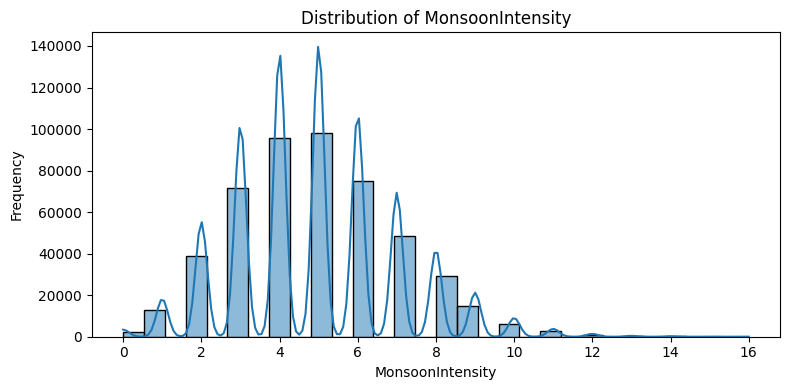

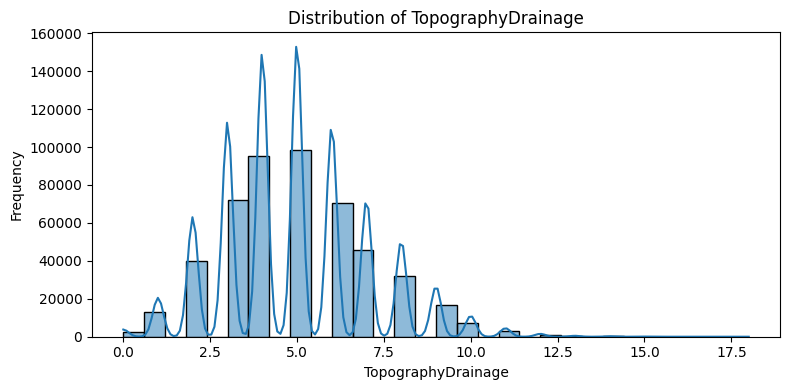

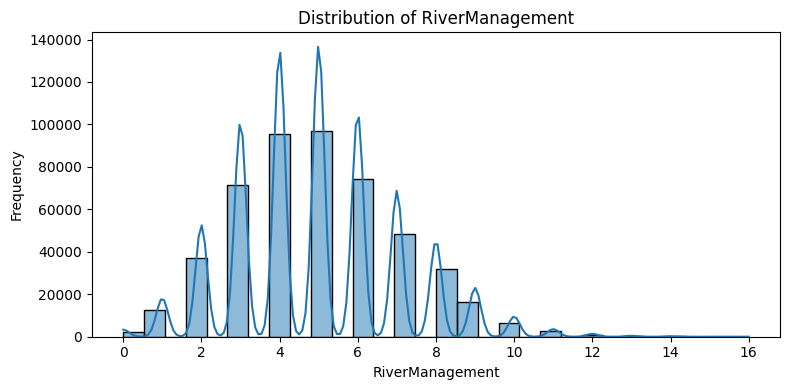

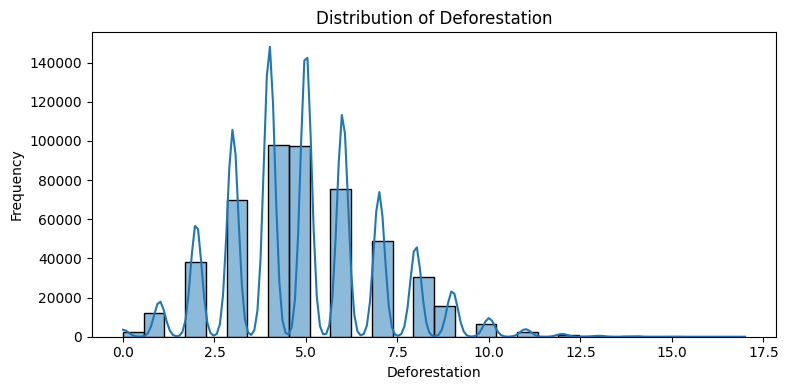

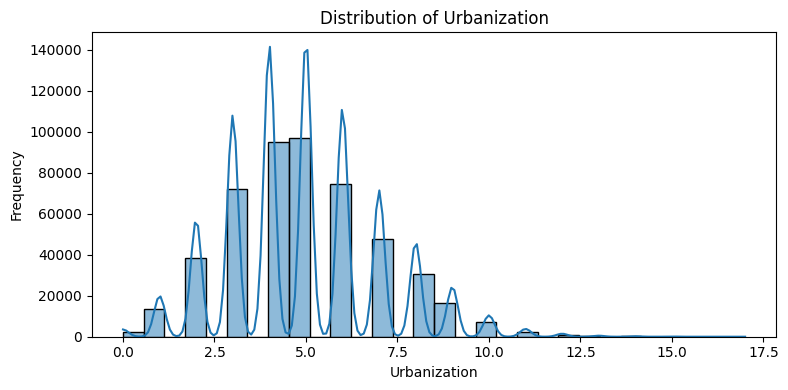

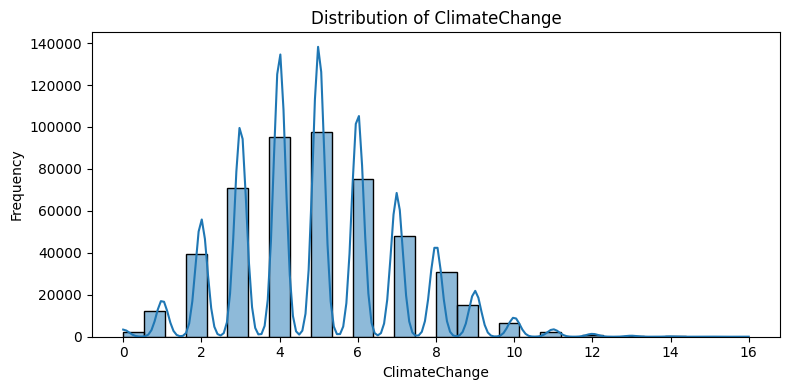

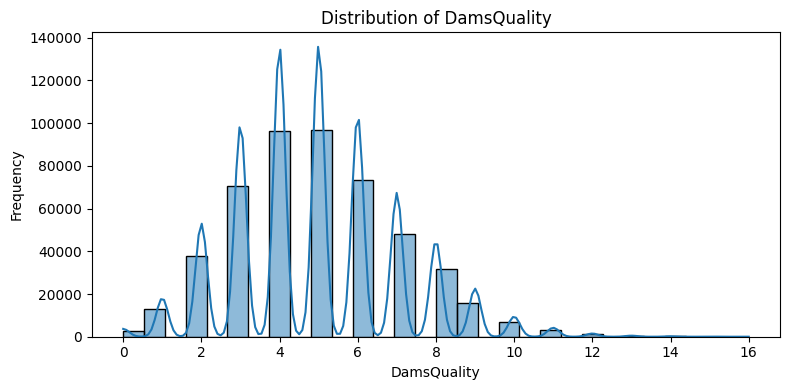

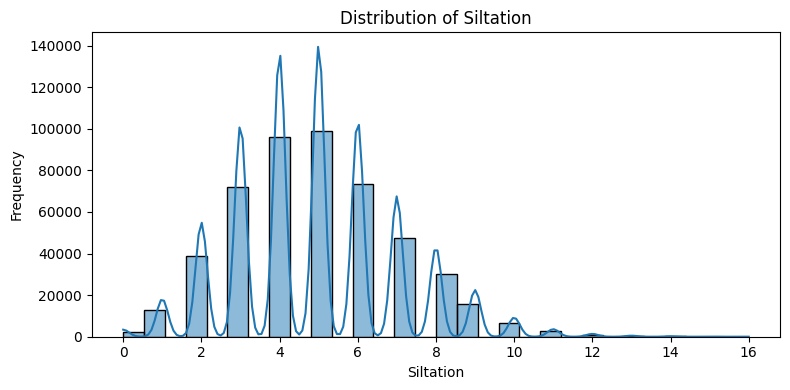

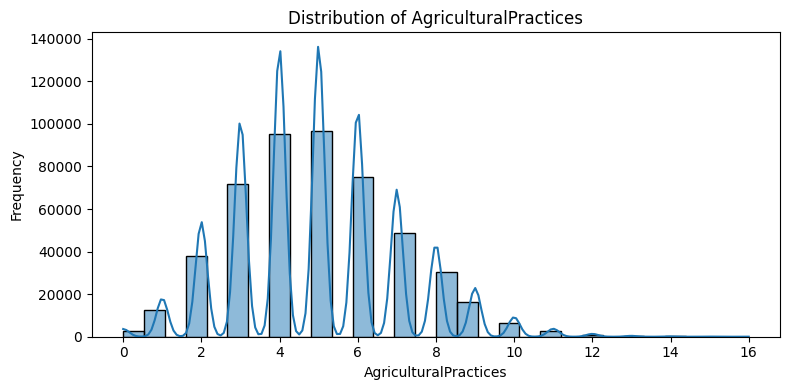

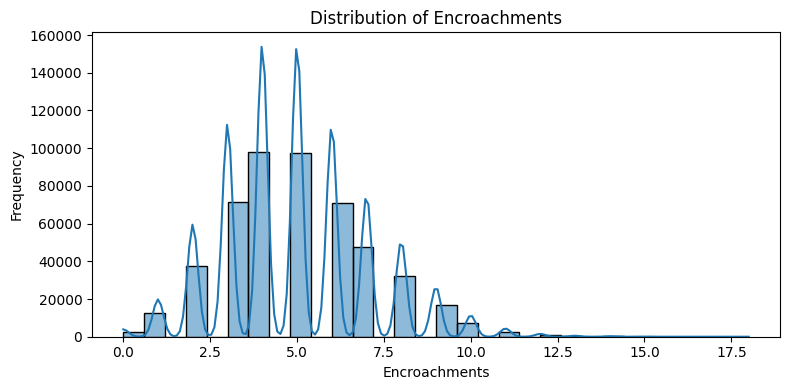

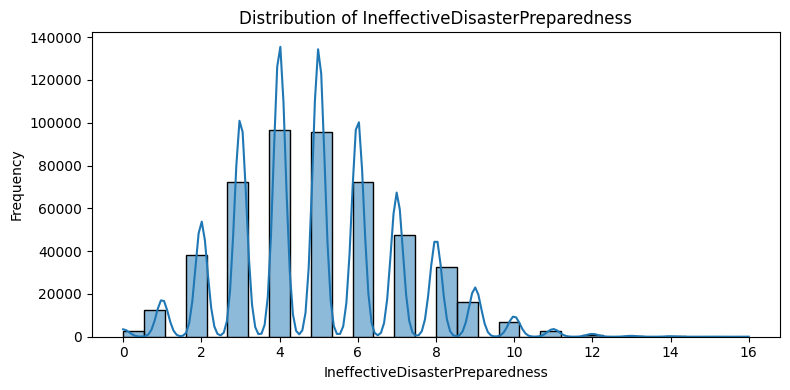

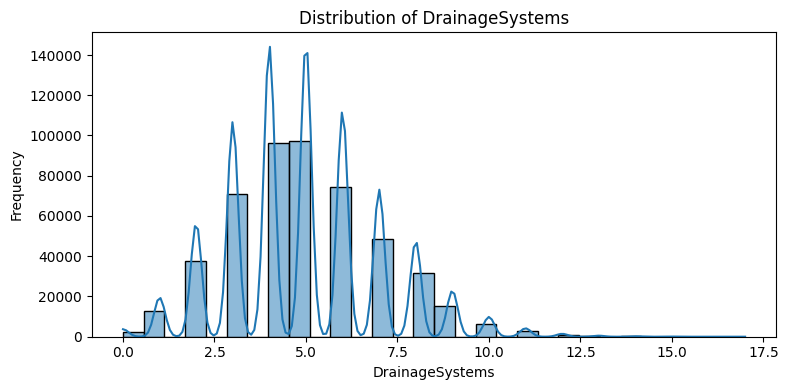

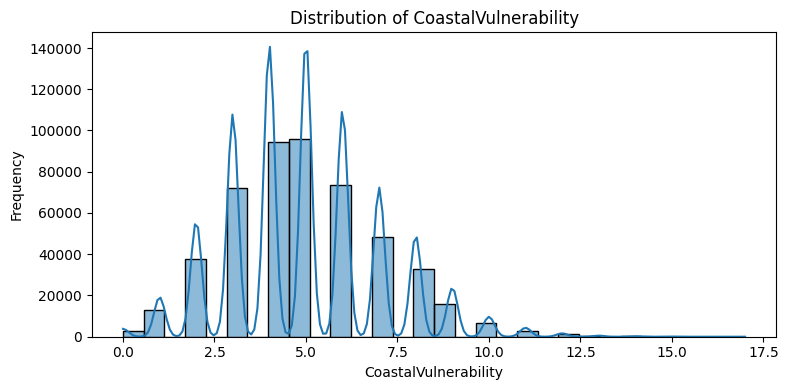

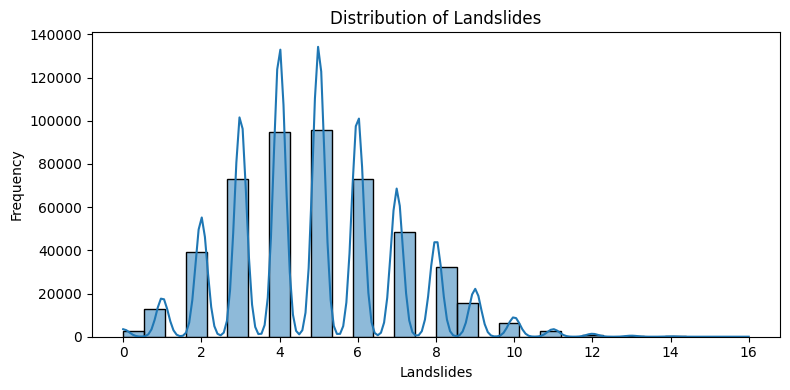

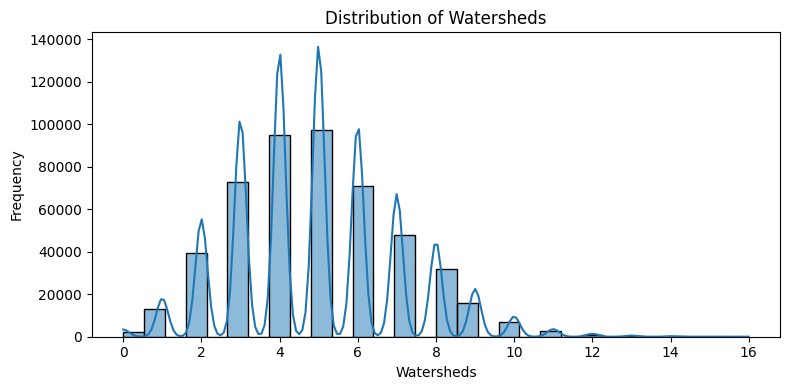

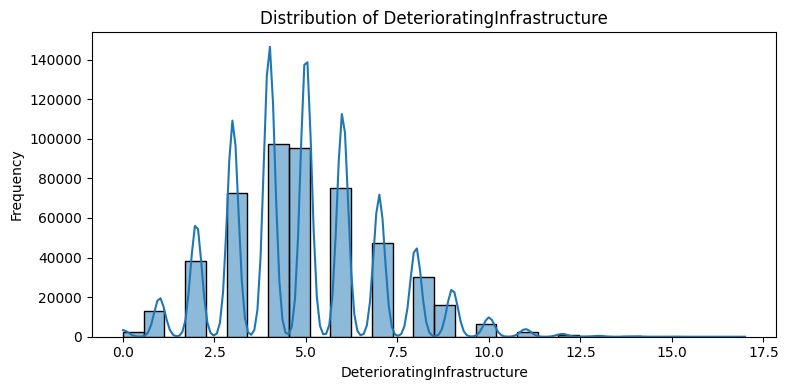

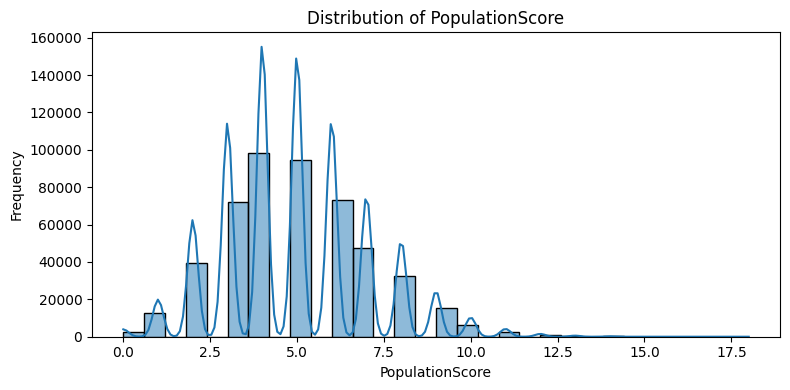

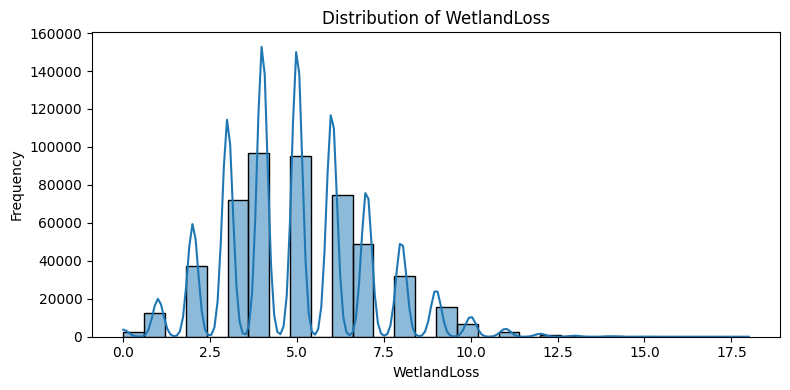

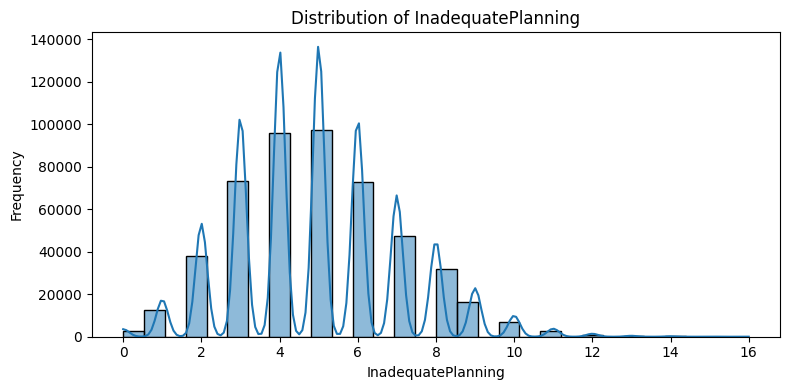

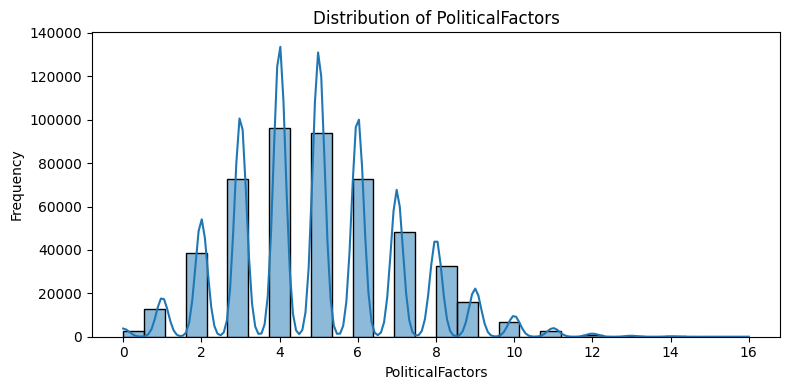

KeyError: 'FloodProbability'

<Figure size 800x400 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(x_train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

0.049641943076936264


<Axes: xlabel='FloodProbability', ylabel='Count'>

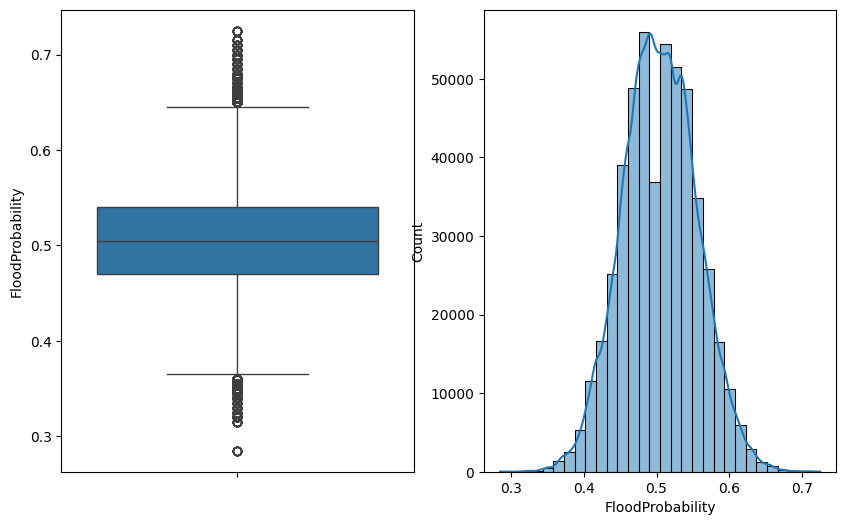

In [ ]:
print(y_train.skew())
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y_train)
plt.subplot(1,2,2)
sns.histplot(y_train,bins=30,kde=True)

In [ ]:
plt.figure(figsize=(23,10))
k=x_train.columns
for i in range(len(x_train.columns)):
  plt.subplot(5,4,i+1)
  sns.scatterplot(x=x_train[k[i]],y=y_train)
  plt.title(f'relationship between {k[i]} and flood_prob ')
  plt.xlabel(k[i])
  plt.xticks(rotation=45)
  plt.ylabel('flood_prob')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c4879c6e980> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c4879c6c2c0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
corr=x_train.corr()
plt.figure(figsize=(20,10))
# Plot Heatmap of the correlation matrix
sns.heatmap(corr,annot=True)

In [ ]:

plt.figure()
plt.subplot(1,2,1)
plt.boxplot(y_train)
plt.ylabel('flood_prob')
t=0
plt.figure(figsize=(16,12))
for i in x_train.columns:

  plt.subplot(8,3,t+1)
  sns.boxplot(x_train[i])
  t=t+1

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
x_train_scaled=StandardScaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled,
                               columns=x_train.columns,
                               index=x_train.index)
# Scale the numerical features present in the validation set
x_test_scaled=StandardScaler.transform(df_test)
x_test_scaled = pd.DataFrame(x_test_scaled,
                              columns=df_test.columns,
                              index=df_test.index)
x_train_scaled

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
0,0.037961,1.464714,0.020114,1.490001,0.509643,-0.454207,-0.457919,-0.931999,-0.939051,-0.456474,-1.417383,0.025932,-0.937918,-0.929673,0.034650,-0.448636,1.000982,0.023413,0.988400,-0.926952
1,0.524453,0.987504,-0.462588,-0.460200,1.471182,1.488453,-0.937633,0.035912,-0.455472,0.503158,1.951396,0.992346,-1.416995,-2.374070,-0.924815,0.036056,-0.928769,-0.943248,-0.454036,-0.926952
2,0.524453,0.033083,0.502815,1.002451,-0.932666,1.002788,-1.897060,0.035912,-0.455472,0.023342,0.507633,0.992346,-0.937918,0.996190,0.034650,0.520748,1.483419,-1.426578,-0.934848,-0.926952
3,-0.935024,-0.444128,0.502815,0.027350,-0.451896,1.488453,-0.457919,1.003822,0.511685,1.462790,0.026379,-1.423689,-0.458840,0.996190,-0.445083,-0.448636,0.518544,0.023413,0.988400,0.028637
4,0.037961,-0.921338,-1.427991,0.514900,-0.451896,-0.454207,-0.937633,-0.931999,-0.939051,-0.936290,0.026379,-1.423689,-1.416995,0.514724,0.514383,-0.448636,-1.893644,-1.426578,-0.934848,0.028637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497796,-0.448532,-0.921338,-0.462588,2.465102,0.028873,0.031458,0.501508,1.003822,0.511685,-0.456474,0.988887,-0.940482,0.499316,0.033259,0.514383,-0.933329,-0.446331,-0.459917,2.911649,-0.449158
497797,0.037961,-0.444128,0.985517,0.514900,0.028873,2.459782,-0.457919,0.035912,-0.455472,0.982974,0.988887,-1.423689,0.499316,0.033259,0.514383,1.005440,0.036106,0.023413,-0.934848,-1.404747
497798,0.037961,-1.398549,-0.462588,1.977552,-0.932666,-0.454207,1.940648,-1.415954,-0.455472,0.023342,1.951396,-1.423689,-0.937918,1.477656,-0.924815,0.036056,-0.446331,0.990074,0.507588,-0.926952


In [ ]:
x_test_scaled

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,-0.448532,0.510293,-0.945289,0.027350,0.509643,1.002788,1.460935,1.003822,1.478843,-0.456474,1.470141,0.025932,0.978394,0.033259,0.514383,-0.933329,0.518544,-0.459917,-0.454036,0.028637
1117958,-0.448532,-0.444128,-1.427991,1.977552,0.028873,0.031458,-0.457919,1.003822,0.028106,-0.456474,-1.417383,-0.457275,0.978394,-0.448207,0.034650,-1.902713,1.000982,-0.459917,-0.454036,-0.926952
1117959,-1.908009,-0.921338,0.502815,0.027350,0.990412,-1.425537,-0.457919,0.519867,-0.455472,-1.416106,0.988887,1.958759,-1.416995,0.033259,0.034650,-1.418021,-0.928769,0.506743,1.469212,-0.926952
1117960,-1.421516,-0.444128,-0.462588,0.514900,-0.451896,0.031458,-0.457919,-0.931999,-0.455472,-0.456474,0.988887,1.475553,-0.458840,0.514724,0.994115,0.520748,-0.446331,-1.426578,-0.454036,-0.449158
1117961,0.524453,-0.921338,-1.427991,-0.460200,0.509643,-0.454207,0.021794,0.035912,-0.939051,0.982974,-0.454875,-0.940482,-1.416995,0.514724,-0.445083,0.520748,1.483419,-0.459917,0.026776,0.028637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863257,0.037961,-0.444128,1.468218,-0.947751,0.028873,-0.454207,-0.457919,0.035912,0.028106,0.023342,0.026379,0.509139,-1.896073,-0.929673,0.034650,0.520748,-0.446331,-0.459917,0.507588,0.506432
1863258,-0.448532,-0.444128,-1.427991,3.440203,-0.451896,-0.939872,-0.457919,-0.931999,0.028106,0.023342,-0.936129,0.992346,-0.458840,-0.448207,-0.924815,0.036056,0.036106,-0.943248,0.026776,-0.449158
1863259,0.037961,0.987504,1.950920,0.027350,0.028873,0.517123,0.981221,0.035912,0.028106,-0.936290,0.507633,2.925173,-0.937918,2.922053,-0.445083,0.036056,1.965857,0.023413,0.026776,-0.449158


In [ ]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

# Add constant (intercept) to training features
x_train_sm = sm.add_constant(x_train_scaled)

'''A constant term was added to the training data to include the intercept in the logistic regression model.'''
x_train_sm

In [ ]:
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()

In [ ]:
print(lr_model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
vif=pd.DataFrame()
vif['features']=x_train_scaled.columns
vif['vif']=[variance_inflation_factor(x_train_scaled.values,i) for i in range(x_train_scaled.shape[1])]
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

In [ ]:
'''import time
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Base learners
estimators = [
    ('rf', RandomForestRegressor(
        n_estimators=50,   # fewer trees for speed
        max_depth=10,      # limit depth
        n_jobs=-1,
        random_state=42
    )),
    ('lr', LinearRegression())
]

# Stacking Regressor
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(
        n_estimators=50,   # fewer trees for speed
        max_depth=10,      # limit depth
        n_jobs=-1,
        random_state=42
    ),
    n_jobs=-1
)

# Time measurement
start_time = time.time()
stack_model.fit(x_train_scaled, y_train)
end_time = time.time()

# Training time
print(f"Training completed in {end_time - start_time:.2f} seconds")

# R² score
r2_score_train = stack_model.score(x_train_scaled, y_train)
print(f"R² score (Train): {r2_score_train:.4f}")'''


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist'
)

params = {
    'n_estimators': [200, 500, 800],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5, 1],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    scoring='r2',
    n_iter=20,
    cv=5,
    verbose=2,
    n_jobs=-1
)


random_search.fit(x_train_scaled, y_train)

print("Best Params:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 0.8, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best R² Score: 0.8395612376313931


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Parameter distribution
param_dist = {
    'n_estimators': [100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Randomized Search with neg RMSE (since lower RMSE = better)
rs = RandomizedSearchCV(
    rf, param_dist,
    n_iter=20, cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42, n_jobs=-1
)

rs.fit(x_train_scaled, y_train)

print("Best Params:", rs.best_params_)
print("Best CV RMSE:", -rs.best_score_)



KeyboardInterrupt: 

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
model=RandomForestRegressor()
model.fit(x_train_scaled, y_train)
r2_score_train = model.score(x_train_scaled, y_train)
r2_score_train'''
#y_pred = random_search.predict(x_train_scaled)
r2_score_train = random_search.score(x_train_scaled, y_train)
r2_score_train

0.8429344745094113

In [ ]:
y_test_pred = model.predict(x_test_scaled)
y_test_pred

In [ ]:
y_test_final=pd.DataFrame({'id':x_test_scaled.index,'FloodProbability':y_test_pred})
y_test_final

In [ ]:
from google.colab import files
y_test_final.to_csv('output.csv', index=False)
files.download('output.csv')
